## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Natural Language Processing

In [5]:
# # Uncomment the below line to install
#! pip install pprint
! pip install spacy
! python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-08 00:53:48.048249: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 855 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score
import numpy as np
#from spacy import en_core_web_md
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Load and examine the data

The "20 newsgroups" dataset contains message posts ("documents") from newgroup message boards, for 20 different topics.

The ultimate goal of the models you construct will be to predict which topic a message belongs to. In order to accomplish these, you'll need to convert the text messages into numerical features, using the various methods we discussed in class. After converting the messages to numeric features, you'll train and test Naive Bayes and SVM models to perform topic classification.

In [9]:
data = fetch_20newsgroups(subset="all")

In [10]:
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [16]:
# Extract the messages and topic labels, and view the topic labels

text = data["data"]
target = data["target"]
print('The following are the 20 topics that a message ("document") can belong to:')
pprint(data["target_names"])
type(target)

The following are the 20 topics that a message ("document") can belong to:
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


numpy.ndarray

In [12]:
# Let's look at an example data sample
i_sample = 0
print(f'A sample with label number "{target[i_sample]}", {data["target_names"][target[i_sample]]}')
print('')
print(text[i_sample])

A sample with label number "10", rec.sport.hockey

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [19]:
# This "20 newsgroups" dataset has a pre-set train/test split, but in this
# assignment we've loaded all the data, and will use a random shuffling and
# split of the data, as we typically do.

X_train, X_test, y_train, y_test = train_test_split(text, target, random_state=0)

print(type(X_train))

print(f"The training dataset contains {len(X_train)} messages.")
print(f"The test dataset contains {len(X_test)} messages.")

<class 'list'>
The training dataset contains 14134 messages.
The test dataset contains 4712 messages.


### Create feature representations

Below you will create numerical representations (a vectors) for each message using three methods we discussed in class.
1. Bag of Words (BoW)
2. Term frequency - Inverse Document Frequency (TF-IDF)
3. Hashing

Note that TF-IDF representations build upon the BoW representations by scaling the term counts in the Bag of Words document term matrix.

Scikit-learn implements the BoW feature representation using [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), and it also has implementations for [TF-IDF](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) and [hashed vector](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html#sklearn.feature_extraction.text.HashingVectorizer) representations. Determine the feature representations of our dataset using each of those approaches.

#### Bag of Words

In [14]:
%%time
# Use "english" stopwords and produce a BoW representation for the data using n-grams with
# n up to 3 (that is, use unigrams, bigrams, and trigrams).
#
# Save the vectorizer (transformer) as "counter".
# Save the transformed data as "X_train_bow", and "X_test_bow".
#
# "Fit" the BoW transformer using the training data only. During the fitting process
# the transformer identifies/learns its unique set of takens/features. When never before
# seen tokens are found in the test set (or any other non-training data), they are
# ignored. That is, they are not counted and included in the BoW representation matrix.
#
# Note that the CountVectorizer object is performing some of the text preprocessing
# discussed in class, including tokenization and removing stop words (but not lemmatization).
# The number of unique token occurences in each document (message) is done after
# this preprocessing.

# YOUR CODE HERE
counter = CountVectorizer(stop_words='english', ngram_range = (1,3))
counter.fit(X_train)
X_train_bow = counter.transform(X_train)
X_test_bow = counter.transform(X_test)


CPU times: user 34.7 s, sys: 1.16 s, total: 35.9 s
Wall time: 36.4 s


In [ ]:
# Let's see how many features (tokens) are in the BoW representations.
# It will be a very large number (> 3M) owing to the use of n-grams with n up
# to 3. It is also large to do the many typos, misspellings, or other
# character sequences that are not actual english words, and thus treated
# as a new/unique token.
#
# You may want to alter the cell above to use only unigrams, or
# only unigrams and bigrams, and see how many features are created in
# those situations. But use n-grams with n up to three before moving
# forward in the notebook.

print(f'The training set has: {X_train_bow.shape[0]:5d} samples and {X_train_bow.shape[1]} features.')
print(f'The test set has:     {X_test_bow.shape[0]:5d} samples and {X_test_bow.shape[1]} features.')

The training set has: 14134 samples and 3034327 features.
The test set has:      4712 samples and 3034327 features.


In [ ]:
assert counter
assert counter.stop_words=="english"
assert counter.ngram_range==(1, 3)
assert len(counter.get_feature_names())==3034327
assert X_train_bow.shape==(14134, 3034327)
assert X_test_bow.shape==(4712, 3034327)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Term frequency - Inverse document frequency

Note that sklearn implements a [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [`TfidfTransformer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html). The main difference between the two is in the inputs to `fit_transform` and `transform`. The [Vectorizer's fit/transform](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit) take an input of text whereas the [Transformer's](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer.fit) take an input of a BoW matrix. Given that we already determined the BoW matrix, it would be more time efficient to use `TfidfTransformer`.

In [ ]:
%%time
# Use the BoW representation you just created above to produce a TF-IDF representation of the data
#
# Save the transformer to "tfidfer".
# Save the transformed data as "X_train_tfidf", and "X_test_tfidf".
#
# As with BoW, using only training data representations for fitting, during
# which time the TF-IDF transformer determines the fixed set of tokens that
# it will represent.

# YOUR CODE HERE
tfidfer = TfidfTransformer()
tfidfer.fit(X_train_bow)
X_train_tfidf = tfidfer.transform(X_train_bow)
X_test_tfidf = tfidfer.transform(X_test_bow)


CPU times: user 2.02 s, sys: 22.6 ms, total: 2.04 s
Wall time: 2.05 s


In [ ]:
assert tfidfer
assert X_train_tfidf.shape==(14134, 3034327)
assert X_test_tfidf.shape==(4712, 3034327)

#### Hashing vectorizer

So far, we've "vectorized" the raw text messages into numerical feature vectors (assembled into a matrix) using BoW and TF-IDF. Both of those techniques determine a vocabulary, a fixed number of tokens, from the training data. When new tokens are found in the test set data they are ignored.

The hashing vectorizer remedies (but not without a downside) this situation by using a hash algorithm to convert a text token into an index (location) into the representation vector. A hash algorithm converts any sequence of bits into a bit sequence of fixed length. That fixed length sequence is thus an integer. There are many facets to this, but as this is not a cryptogryphy course (hashing is often used as a method to confirm that a digital document/stream has not been altered), we won't discuss those facets here.

The main point is, a hashing vectorizer can deal with test set tokens that is has never seen before, and "find" a place for them in the output feature representation.

In [ ]:
%%time 
# Use "english" stopwords and produce a hashed vector representation for the data using up to trigrams.
#
# Save the vectorizer as "hasher".
# Save the transformed data as "X_train_hash" and "X_test_hash".
#
# Make sure you set alternate_sign to False so we can use this representation with Multinomial Naive
# Bayes later in the notebook.

# YOUR CODE HERE
hasher = HashingVectorizer(stop_words = 'english', ngram_range=(1,3), alternate_sign=False)
hasher.fit(X_train)
X_train_hash = hasher.transform(X_train)
X_test_hash = hasher.transform(X_test)

CPU times: user 7.77 s, sys: 33.6 ms, total: 7.81 s
Wall time: 7.83 s


In [ ]:
# Let's see how many features (tokens) are in the hashed representations

print(f'The training set has: {X_train_hash.shape[0]:5d} samples and {X_train_hash.shape[1]} features.')
print(f'The test set has:     {X_test_hash.shape[0]:5d} samples and {X_test_hash.shape[1]} features.')

The training set has: 14134 samples and 1048576 features.
The test set has:      4712 samples and 1048576 features.


In [ ]:
assert hasher
assert hasher.stop_words == "english"
assert hasher.ngram_range == (1,3)
assert X_train_hash.shape == (14134, 1048576)
assert X_test_hash.shape == (4712, 1048576)

Having passed the asserts above, we see that the hashing vectorizer produced feature vectors with 1048576 features. Recall that the hash algorithm creates outputs with a fixed number of bits, and `2**n_bits` must be the number of possible features in the representation.

Just out of curiosity, let's see how many output bits were produced by the hash algorithm.

In [ ]:
# Just out of curiosity, let's see how many output bits were produced by the hash algorithm.

n_features = X_test_hash.shape[1]
n_bits = np.log2(n_features)
print(f"The hash algorithm generated {n_bits}-bit representations, and thus 2^{n_bits}=={n_features} features.")

The hash algorithm generated 20.0-bit representations, and thus 2^20.0==1048576 features.


Compare the time it took to run the count vectorizer versus the hashing vectorizer even though they both will iterate through all the words.

Note that TF-IDF built upon the BoW representations, to that BoW time should be added in to the TF-IDF time.

## A Naive Bayes classifier model, with engineered features

New you'll build classifier models that use the vector feature representations you just created.

Recall [Naive Bayes Classification](http://scikit-learn.org/stable/modules/naive_bayes.html) which we discussed early on in the supervised learning lectures. We will use Naive Bayes classifiers to predict the topic of the articles and compare our feature representations.

Use a Multinomial Naive Bayes classifier to predict the topics.

In [ ]:
for feat_name, train_feat, test_feat in zip(["Bag of Words", "TF-IDF", "Hashing"],
                                            [X_train_bow, X_train_tfidf, X_train_hash],
                                            [X_test_bow, X_test_tfidf, X_test_hash]):
    
    # Create a Multinomial Naive Bayes model and saved it to `mnb`
    # Fit the 'mnb' model to the training features and labels, for
    # the BoW, TF-IDF, or hashing features in this loop.
    # YOUR CODE HERE
    mnb = MultinomialNB()
    mnb.fit(train_feat, y_train)
    
    y_pred = mnb.predict(test_feat)
    print(f"Results for {feat_name}")
    print("-"*80)
    print(classification_report(y_test, y_pred))
    print("-"*80)

Results for Bag of Words
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       205
           1       0.78      0.87      0.82       245
           2       0.92      0.76      0.83       250
           3       0.77      0.83      0.80       243
           4       0.89      0.85      0.87       255
           5       0.84      0.91      0.88       240
           6       0.90      0.75      0.82       249
           7       0.89      0.90      0.89       219
           8       0.96      0.91      0.94       246
           9       0.92      0.97      0.94       227
          10       0.96      0.98      0.97       287
          11       0.88      0.97      0.92       234
          12       0.93      0.82      0.87       247
          13       0.93      0.92      0.93       250
          14       0.90      0.96      0.93       240
          15       0.93      

In [ ]:
assert isinstance(mnb, MultinomialNB)

## Latent Dirichlet Allocation (optional)

LDA is a topic modeling approach that can be used to determine high level topics covered in a corpus. Identified topics can help us determine the concepts covered in the corpus and better understand what is being discussed. The topic relevance can be used as a useful feature representation for each document. 

Scikit-learn has an implementation available for [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html).

Fitting this data can take a **very long time** so this code is just provided for you to uncomment it and examine the results. You can continue with the rest of the notebook while this runs.

In [ ]:
%%time
# Feel free to change the number of topics to find by updating n_components
lda = LatentDirichletAllocation(n_components=30)
lda.fit(X_train_bow)

CPU times: user 6min 44s, sys: 3min 53s, total: 10min 37s
Wall time: 6min 16s


LatentDirichletAllocation(n_components=30)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    rows = model.n_components // 5
    if rows % 5 != 0:
        rows +=1
    fig, axes = plt.subplots(rows, 5, figsize=(45, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


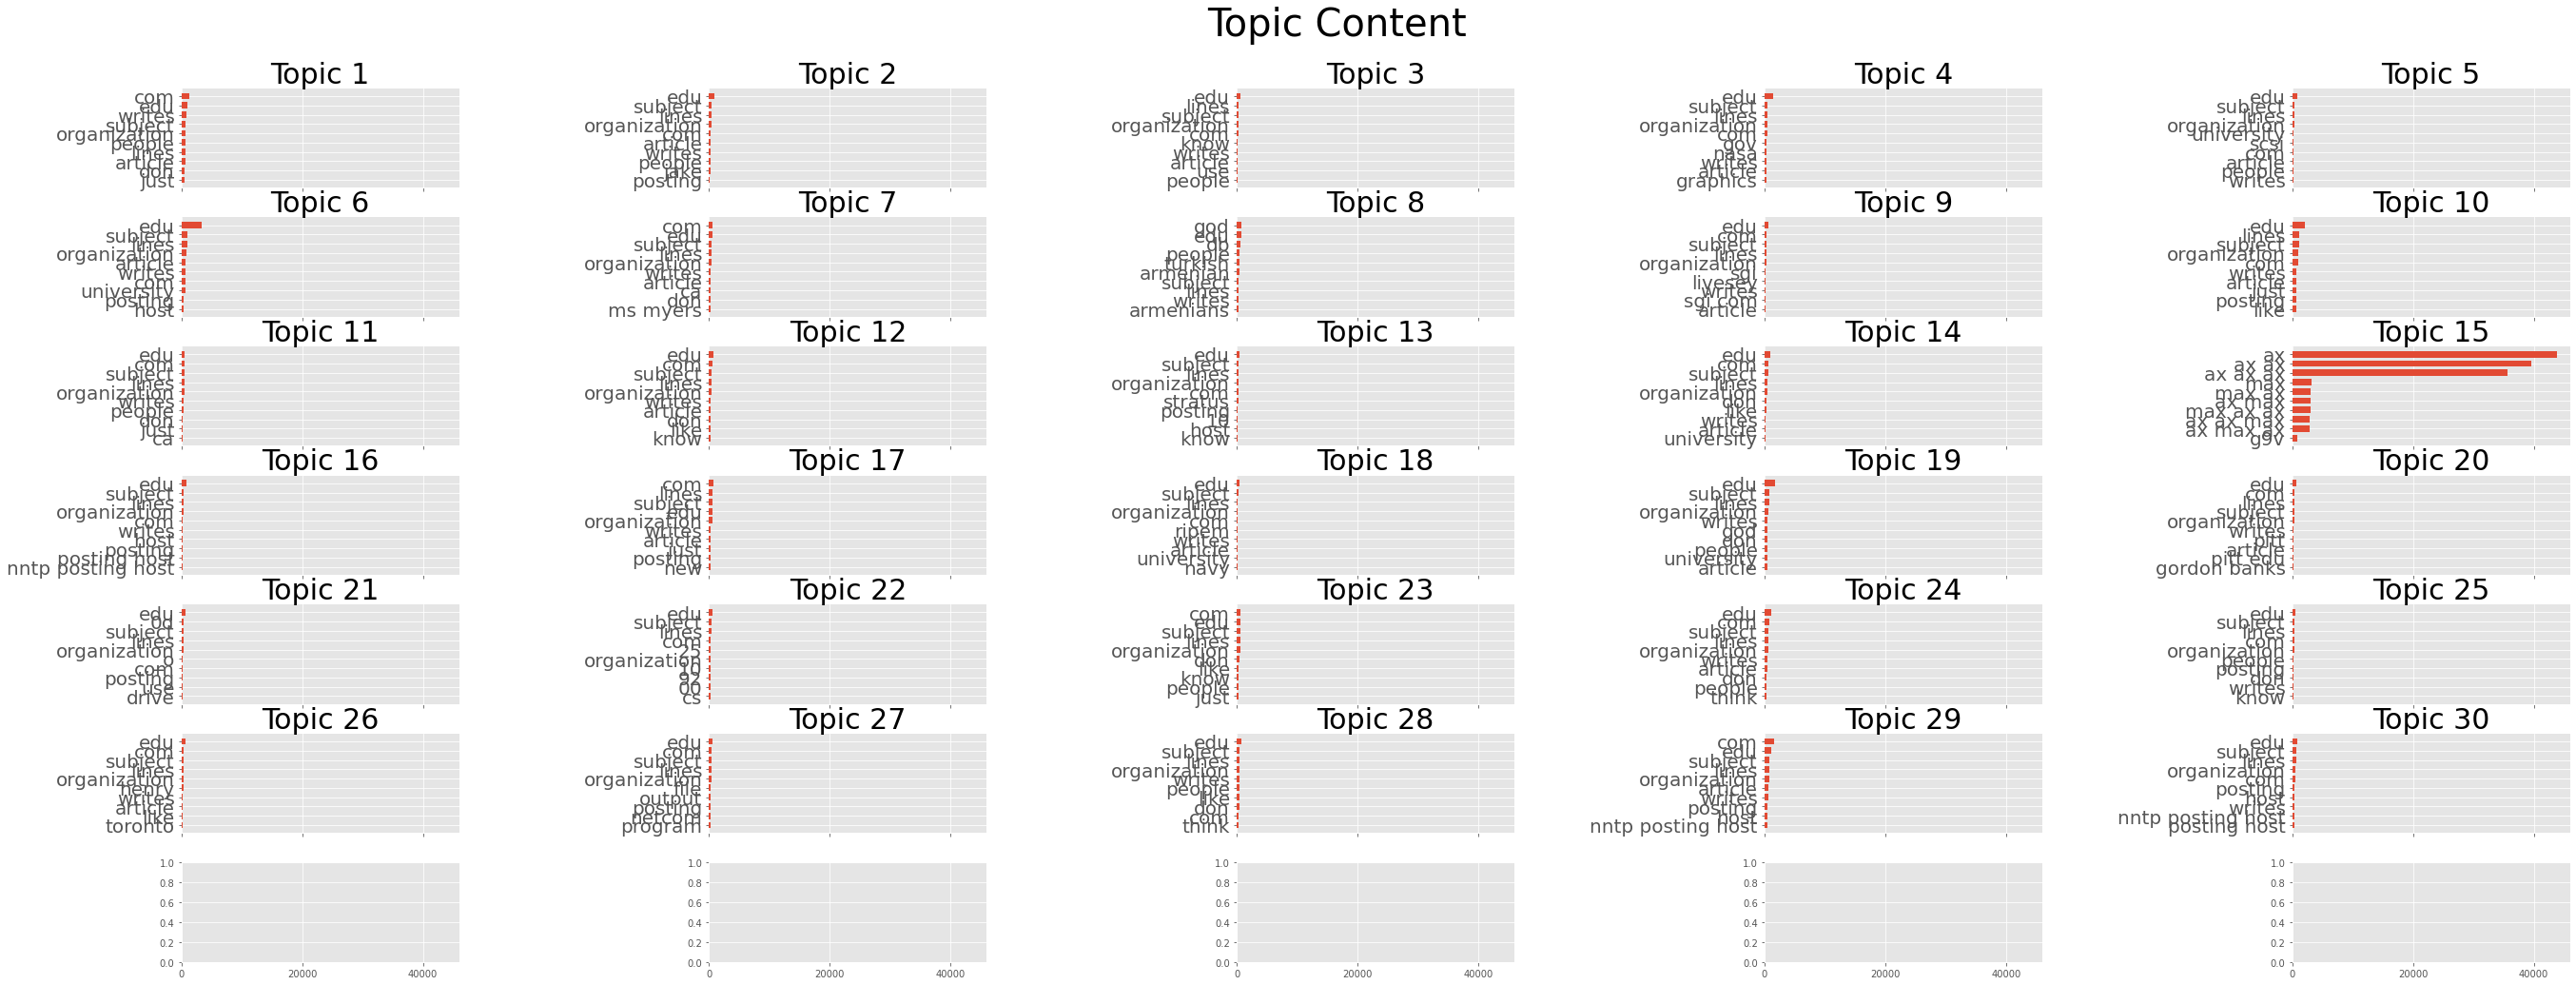

In [ ]:
#plot_top_words(lda, counter.get_feature_names(), 10, "Topic Content")

In [ ]:
print(f"The following names are the target classes:")
print(data.target_names)
print(f"What do you think of the similarity between topics you found and the classes? Are these useful topics?")

The following names are the target classes:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
What do you think of the similarity between topics you found and the classes? Are these useful topics?


In [ ]:
%%time
# X_train_lda = lda.transform(X_train_bow)
# X_test_lda = lda.transform(X_test_bow)
# svm = LinearSVC().fit(X_train_lda, y_train)
# y_pred = svm.predict(X_test_lda)
# print(classification_report(y_test, y_pred))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


**PLEASE**  

**If you uncommented and ran the above Latent Dirichlet Allocation (LDA) code, recomment it afterwards, as this will help speed up grading time.**  

**Thank you!!**

## Learned Embeddings

We'll now move on to the use of __learned__ representations, rather than ones the were, to some degree, engineered (e.g., the decision to base the features on token counts). We will use [spacy](https://spacy.io/), for more sophisticated NLP. Make sure you downloaded the english model in the commented code at the top of the notebook (`en_core_web_md`) before proceeding. It may take some time to download.

Spacy allows us to parse text and automatically does the following:
- tokenization
- lemmatization
- sentence splitting
- entity recognition
- token vector representation


__We'll start by creating an example string, and observing the results of `spacy`'s preprocessing. Then you can create your own example string and do the same.__

In [ ]:
%%time

# The spacy models are of small (sm), medium (md) and large (lg)
# sizes. We'll use the medium-sized model.
nlp = en_core_web_md.load()

CPU times: user 1.74 s, sys: 45.1 ms, total: 1.79 s
Wall time: 1.81 s


In [ ]:
text = "This is the first sentence in this test string. The quick brown fox jumps over the lazy dog."

parsed_text = nlp(text)

for sent in parsed_text.sents:
    print(f"Analyzing sentence: {sent}")
    print(f"Lemmatization: {sent.lemma_}")
    for token in sent:
        print(f"Analyzing token: {token}")
        if token.is_sent_start:
            print("This token is the first one in the sentence")
        if token.is_stop:
            print("Stop word")
        else:
            print("Not stop word")
        print(f"Entity type: {token.ent_type_}")
        print(f"Part of speech: {token.pos_}")
        print(f"Lemma: {token.lemma_}")
        print("-"*10)
    print("-"*50)

Analyzing sentence: This is the first sentence in this test string.
Lemmatization: this be the first sentence in this test string.
Analyzing token: This
This token is the first one in the sentence
Stop word
Entity type: 
Part of speech: PRON
Lemma: this
----------
Analyzing token: is
Stop word
Entity type: 
Part of speech: AUX
Lemma: be
----------
Analyzing token: the
Stop word
Entity type: 
Part of speech: DET
Lemma: the
----------
Analyzing token: first
Stop word
Entity type: ORDINAL
Part of speech: ADJ
Lemma: first
----------
Analyzing token: sentence
Not stop word
Entity type: 
Part of speech: NOUN
Lemma: sentence
----------
Analyzing token: in
Stop word
Entity type: 
Part of speech: ADP
Lemma: in
----------
Analyzing token: this
Stop word
Entity type: 
Part of speech: DET
Lemma: this
----------
Analyzing token: test
Not stop word
Entity type: 
Part of speech: NOUN
Lemma: test
----------
Analyzing token: string
Not stop word
Entity type: 
Part of speech: NOUN
Lemma: string
--------

In [ ]:
# Come up with a couple sentences to test out, put them into a single string (pair
# of quuotes), and name that string "my_text".
# Or, go to a website and copy a paragraph from there.

# YOUR CODE HERE
my_text = "We are pirates who sail the sea in search of gold. We know that it lies beneath the X. We need your help sailing and there's enough gold for you to have a share."


In [ ]:
assert len(my_text) > 10
assert my_text.count(".") > 2  # Two or more sentences

In [ ]:
parsed = nlp(my_text)
for sent in parsed.sents:
    print(f"Analyzing sentence: {sent}")
    print(f"Lemmatization: {sent.lemma_}")
    for token in sent:
        print(f"Analyzing token: {token}")
        if token.is_sent_start:
            print("This token is the first one in the sentence")
        if token.is_stop:
            print("Stop word")
        else:
            print("Not stop word")
        print(f"Entity type: {token.ent_type_}")
        print(f"Part of speech: {token.pos_}")
        print(f"Lemma: {token.lemma_}")
        print("-"*10)
    print("-"*50)

Analyzing sentence: We are pirates who sail the sea in search of gold.
Lemmatization: we be pirate who sail the sea in search of gold.
Analyzing token: We
This token is the first one in the sentence
Stop word
Entity type: 
Part of speech: PRON
Lemma: we
----------
Analyzing token: are
Stop word
Entity type: 
Part of speech: AUX
Lemma: be
----------
Analyzing token: pirates
Not stop word
Entity type: 
Part of speech: NOUN
Lemma: pirate
----------
Analyzing token: who
Stop word
Entity type: 
Part of speech: PRON
Lemma: who
----------
Analyzing token: sail
Not stop word
Entity type: 
Part of speech: VERB
Lemma: sail
----------
Analyzing token: the
Stop word
Entity type: 
Part of speech: DET
Lemma: the
----------
Analyzing token: sea
Not stop word
Entity type: 
Part of speech: NOUN
Lemma: sea
----------
Analyzing token: in
Stop word
Entity type: 
Part of speech: ADP
Lemma: in
----------
Analyzing token: search
Not stop word
Entity type: 
Part of speech: NOUN
Lemma: search
----------
Analyz

If we use the larger `spacy` models, we'll get the __GloVe representation__ for some words. GloVe representations are "pre-trained" (learned) from a large language corpus. In this case, the GloVe vectors should have 300 features.

In [ ]:
token.vector.shape

(300,)

## An SVM classifier model, with learned embedding features

Now you'll use `spacy` to get GloVe feature representations of a subset of the messages, and then train and test an SVM that makes topic predictions based on those features.

Given that the parsing of text takes some time, we will only use __the first 1000 messages__ in our data. __You will get notably lower performance versus the NB models which used the engineered features, but that is almost solely due to the use of a much smaller data set here.__ You may edit the cell below and use more data, but __please__ reset it to 1000 afterwards, or the autograder may not be able to score your notebook.

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_train[:1000], y_train[:1000], random_state=0)

NameError: ignored

In [ ]:
%%time
# Using the "nlp" from above, parse every instance of new_X_train
# save the document vectors to a np.array called X_train_glove

# YOUR CODE HERE
X_train_glove = np.empty((len(new_X_train), 300))
X_test_glove = np.empty((len(new_X_test), 300))
for i in range(len(new_X_train)):
  np.append(X_train_glove, nlp(new_X_train[i]))
for i in range(len(new_X_test)):
  np.append(X_test_glove, nlp(new_X_test[i]))

CPU times: user 1min 23s, sys: 2.87 s, total: 1min 26s
Wall time: 1min 26s


In [ ]:
assert X_train_glove.shape == (len(new_X_train), 300)
assert X_test_glove.shape == (len(new_X_test), 300)

In [ ]:
svm = LinearSVC().fit(X_train_glove, new_y_train)
y_pred = svm.predict(X_test_glove)

# Due to the smaller data set size, you may get "Precision and F-score are ill-defined"
# warnings from the classification_report() below. That is anticipated and of no concern.
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        18
           8       0.07      0.88      0.12        17
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        14
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

## Feedback

In [ ]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    feedback = "Kind of a big jump into NLP. It seems like this project could use some more real text examples."
    return feedback  

In [ ]:
feedback()

'Kind of a big jump into NLP. It seems like this project could use some more real text examples.'